In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
ds = pd.read_csv("C:/Users/jenis/Desktop/DDSC_Sentiment Analysis/Twitter/Tweets.csv")

In [3]:
ds.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
#checking for null values and dropping if any present
ds.isnull().values.any()
ds = ds.dropna()

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [12]:
#check for duplicate values
##here we have used (.sum) to know that total duplicate value is 0
ds.duplicated().sum()

0

In [16]:
#Categorize the data in a new column: "tag_id"
## for eg, 0 : neutral, 1:positive

ds['tag_id'] = ds['sentiment']
for i in ds.index:
    if ds['sentiment'][i] == "neutral":
        ds['tag_id'][i] = 0
    elif ds['sentiment'][i] == "positive":
        ds['tag_id'][i] = 1
    elif ds['sentiment'][i] == "negative":
        ds['tag_id'][i] = 2

In [17]:
ds.head()

,textID,text,selected_text,sentiment,tag_id
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2
2,088c60f138,my boss is bullying me...,bullying me,negative,2
3,9642c003ef,what interview! leave me alone,leave me alone,negative,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,2


In [28]:
# Percentage distribution of Sentiment in the Data
count = ds['sentiment'].value_counts()
total_count = len(ds)
neutral_count = count[0]
positive_count = count[1]
negative_count = count[2]
neutral_percentage = (round((neutral_count/total_count)*100))
positive_percentage = (round((positive_count/total_count)*100))
negative_percentage = (round((negative_count/total_count)*100))

In [29]:
neutral_percentage

40

In [30]:
positive_percentage

31

In [31]:
negative_percentage

28

In [40]:
pip install wordcloud

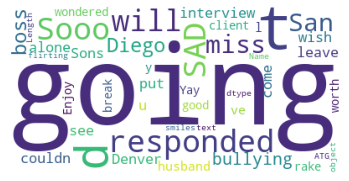

In [53]:
# Word cloud
a=ds['text']
plt.axis('off')
wordcloud = WordCloud(background_color="white").generate(str(a))
plt.imshow(wordcloud)

In [88]:
# Convert the tweet to lower case/upper case 
tweet_text=ds['text']
print(tweet_text)
type(tweet_text)

## Upper case
tweet_text.str.upper()

##Lower case
tweet_text.str.lower()

0                      I`d have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I`ve wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: text, Length: 27480, dtype: object


0                      i`d have responded, if i were going
1            sooo sad i will miss you here in san diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on denver  husband l...
27477     i`ve wondered about rake to.  the client has ...
27478     yay good for both of you. enjoy the break - y...
27479                           but it was worth it  ****.
27480       all this flirting going on - the atg smiles...
Name: text, Length: 27480, dtype: object

In [100]:
sw = set(stopwords.words("english"))
neg_sw = ["no", "nor", "not"]
pos_sw = [i for i in sw if i not in neg_sw]

In [101]:
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [103]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    K = []
    for i in text:
        if i.isalnum():
            K.append(i)
    
    text = K[:]
    K.clear()
    
    for i in text:
        if i not in pos_sw and i not in string.punctuation:
            K.append(i)
            
    text = K[:]
    K.clear()
    
    for i in text:
        K.append(ps.stem(i))
        
    return " ".join(K)

In [119]:
ds['trans_text'] = ds['text'].apply(transform_text)

In [120]:
ds.head()

,textID,text,selected_text,sentiment,tag_id,trans_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0,respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,2,boss bulli
3,9642c003ef,what interview! leave me alone,leave me alone,negative,2,interview leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,2,son put releas alreadi bought


In [123]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 8000, ngram_range=(1,2))
X = cv.fit_transform(ds['trans_text']).toarray()
y = ds['sentiment']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [129]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix,recall_score

In [131]:
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(max_iter=300, multi_class="multinomial")
rfc = RandomForestClassifier(n_estimators=50, random_state=2, max_depth=25)
dtc = DecisionTreeClassifier(max_depth=30)

In [132]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average="micro")
    
    return accuracy,precision

In [133]:
clfs = {
    'Multinomial Naive Bayes': mnb, 
    'Bernoulli Naive Bayes': bnb, 
    'Logistic Regression': lr, 
    'Random Forest Clasifier': rfc,
    'Decision Tree Clasifier': dtc 
}

In [134]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Multinomial Naive Bayes
Accuracy -  0.6444687045123726
Precision -  0.6444687045123726
For  Bernoulli Naive Bayes
Accuracy -  0.6479257641921398
Precision -  0.6479257641921398
For  Logistic Regression
Accuracy -  0.6854075691411936
Precision -  0.6854075691411936
For  Random Forest Clasifier
Accuracy -  0.6137190684133915
Precision -  0.6137190684133915
For  Decision Tree Clasifier
Accuracy -  0.6448326055312955
Precision -  0.6448326055312955


In [138]:
performance=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False,ignore_index=True)

In [139]:
performance

,Algorithm,Accuracy,Precision
0,Logistic Regression,0.685408,0.685408
1,Bernoulli Naive Bayes,0.647926,0.647926
2,Decision Tree Clasifier,0.644833,0.644833
3,Multinomial Naive Bayes,0.644469,0.644469
4,Random Forest Clasifier,0.613719,0.613719
